## Notebook k-ppv

In [1]:
# Décommenter à la première utilisation du notebook, puis commenter ensuite
#!pip3 install sklearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [3]:
def set_default(figsize=(7, 4), dpi=100):

    plt.rc('figure', figsize=figsize,dpi=dpi)
    plt.rcParams['axes.labelsize'] = 12
        
    plt.rcParams['text.color'] = 'black'

    plt.rcParams['lines.linewidth'] = 1
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10
    plt.rcParams['savefig.bbox'] = 'tight'
    plt.rcParams['legend.frameon'] = False
    
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

def set_aspect(ax):
    options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}
    ax.spines['left'].set_position(('data', 0))
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['right'].set_position(('data', -1))
    ax.spines['top'].set_position(('data', -1))
    ax.grid(True,ls=':')


def plot_decision_boundaries(clusterer, ax,X, resolution=500):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="coolwarm")
    ax.plot(X[:, 0], X[:, 1], 'k.', markersize=8)
    ax.axis('off')

### Données

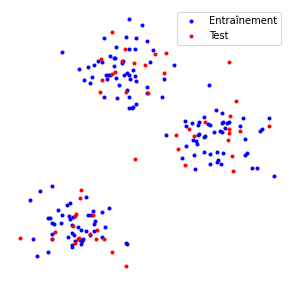

In [4]:
X, y = make_blobs(n_samples=200, centers=3,cluster_std = 2,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42,shuffle=True)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(X_train[:, 0], X_train[:, 1], 'b.', label="Entraînement")
ax.plot(X_test[:, 0], X_test[:, 1], 'r.', label="Test")
ax.legend(loc='best')
ax.axis('off');


In [5]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

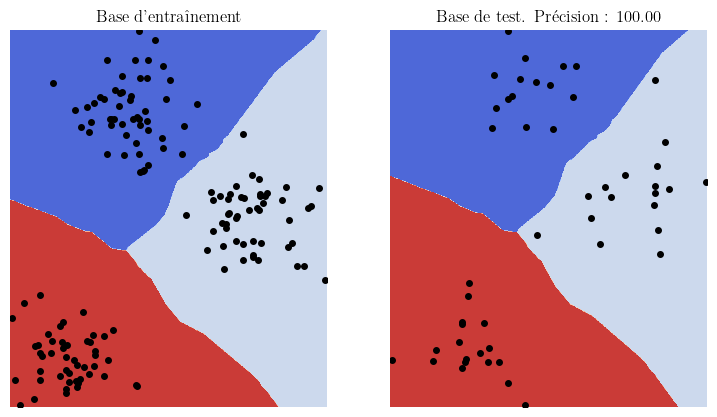

In [6]:
set_default()
fig, ax = plt.subplots(1, 2, figsize=(9, 5))
plot_decision_boundaries(model,ax[0],X_train)
ax[0].set_title("Base d'entraînement")

y_pred = model.predict(X_test)
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100
plot_decision_boundaries(model,ax[1],X_test)
ax[1].set_title("Base de test. Précision : %.2f%%" % accuracy);